In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
instal = pd.read_csv('C:\\Users\\Dell\\OneDrive - National Economics University\\code\\visualization\\final_data\\data\\dseb63_installments_payments.csv')

instal.head(10)

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
5,1054186,1.0,8,-1120.0,-1175.0,6948.360,6948.360,147397.0
6,1054186,1.0,12,-1000.0,-1033.0,6935.220,6935.220,147397.0
7,2452854,1.0,20,-576.0,-578.0,11302.605,11302.605,147397.0
8,1644291,1.0,11,-140.0,-144.0,22048.560,22048.560,147397.0
9,1054186,1.0,3,-1270.0,-1275.0,6948.360,6948.360,147397.0


In [4]:
instal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
 7   SK_ID_CURR              float64
dtypes: float64(6), int64(2)
memory usage: 472.7 MB


In [5]:
target = pd.read_csv('C:\\Users\\Dell\\OneDrive - National Economics University\\code\\visualization\\final_data\\data\\target.csv')

target.head()

,SK_ID_CURR,TARGET
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0


### Dataset Overview


#### Dataset Basic Statistics

In [6]:
print(f'Number of unique SK_ID_PREV in instalments_payments.csv are: {len(instal.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in instalments_payments.csv are: {len(instal.SK_ID_CURR.unique())}')

print(f'Number of overlapping SK_ID_CURR in application_train.csv and instalments_payments.csv are: {len(set(target.SK_ID_CURR.unique()).intersection(set(instal.SK_ID_CURR.unique())))}')

print(f'Number of duplicate values in instalments_payments: {instal.shape[0] - instal.duplicated().shape[0]}')


Number of unique SK_ID_PREV in instalments_payments.csv are: 549020
Number of unique SK_ID_CURR in instalments_payments.csv are: 180734
Number of overlapping SK_ID_CURR in application_train.csv and instalments_payments.csv are: 144408
Number of duplicate values in instalments_payments: 0


In [7]:
var_num = len(instal.columns)
observe_num = len(instal)

missing_num = instal.isnull().sum().sum()
missing_per = (missing_num/ (var_num*observe_num)) *100

duplicate_num = instal.duplicated().sum()
duplicate_per = (duplicate_num/ len(instal)) *100

In [8]:
stats = [
        {'Metric': 'Number of variables', 'Value': var_num},
        {'Metric': 'Number of observations', 'Value': observe_num},
        {'Metric': 'Missing cells', 'Value': missing_num},
        {'Metric': 'Missing cells (%)', 'Value': f'{missing_per.sum():.3f}%'},
        {'Metric': 'Duplicate rows', 'Value': duplicate_num},
        {'Metric': 'Duplicate rows (%)', 'Value': f'{duplicate_per:.3f}%'},
    ]

stat = pd.DataFrame(stats)

stat

,Metric,Value
0,Number of variables,8
1,Number of observations,7744758
2,Missing cells,3280
3,Missing cells (%),0.005%
4,Duplicate rows,0
5,Duplicate rows (%),0.000%


#### Variable Types

In [9]:
numeric = instal.select_dtypes(include = [np.number]).columns.size
categorical = instal.select_dtypes(include = ['object', 'category']).columns.size
datetime = instal.select_dtypes(include = ['datetime64']).columns.size
boolean = instal.select_dtypes(include = ['bool']).columns.size

In [10]:
var = [        
        {'Metric': 'Numeric', 'Value': numeric},
        {'Metric': 'Categorical', 'Value': categorical},
        {'Metric': 'Datetime', 'Value': datetime},
        {'Metric': 'Boolean', 'Value': boolean}
        ]

var_type = pd.DataFrame(var)
var_type

,Metric,Value
0,Numeric,8
1,Categorical,0
2,Datetime,0
3,Boolean,0


### EDA

#### Missing Values

In [11]:
instal_cols = instal.columns.tolist()

# Remove unnecessary columns
instal_cols.remove('SK_ID_CURR')
instal_cols.remove('SK_ID_PREV')

In [12]:
def find_missing(data):
    count_missing = data.isnull().sum().values
    total = data.shape[0]
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing},\
                         index=data.columns.values).query('missing_ratio>0').sort_values(['missing_ratio'], ascending=False)

In [ ]:
find_missing(instal)

,missing_count,missing_ratio
DAYS_ENTRY_PAYMENT,1639,2.116270e-04
AMT_PAYMENT,1639,2.116270e-04
AMT_INSTALMENT,1,1.291196e-07
SK_ID_CURR,1,1.291196e-07


- Drop missing values in SK_ID_CURR and AMT_INSTALMENT (only 1 value observed in each column)

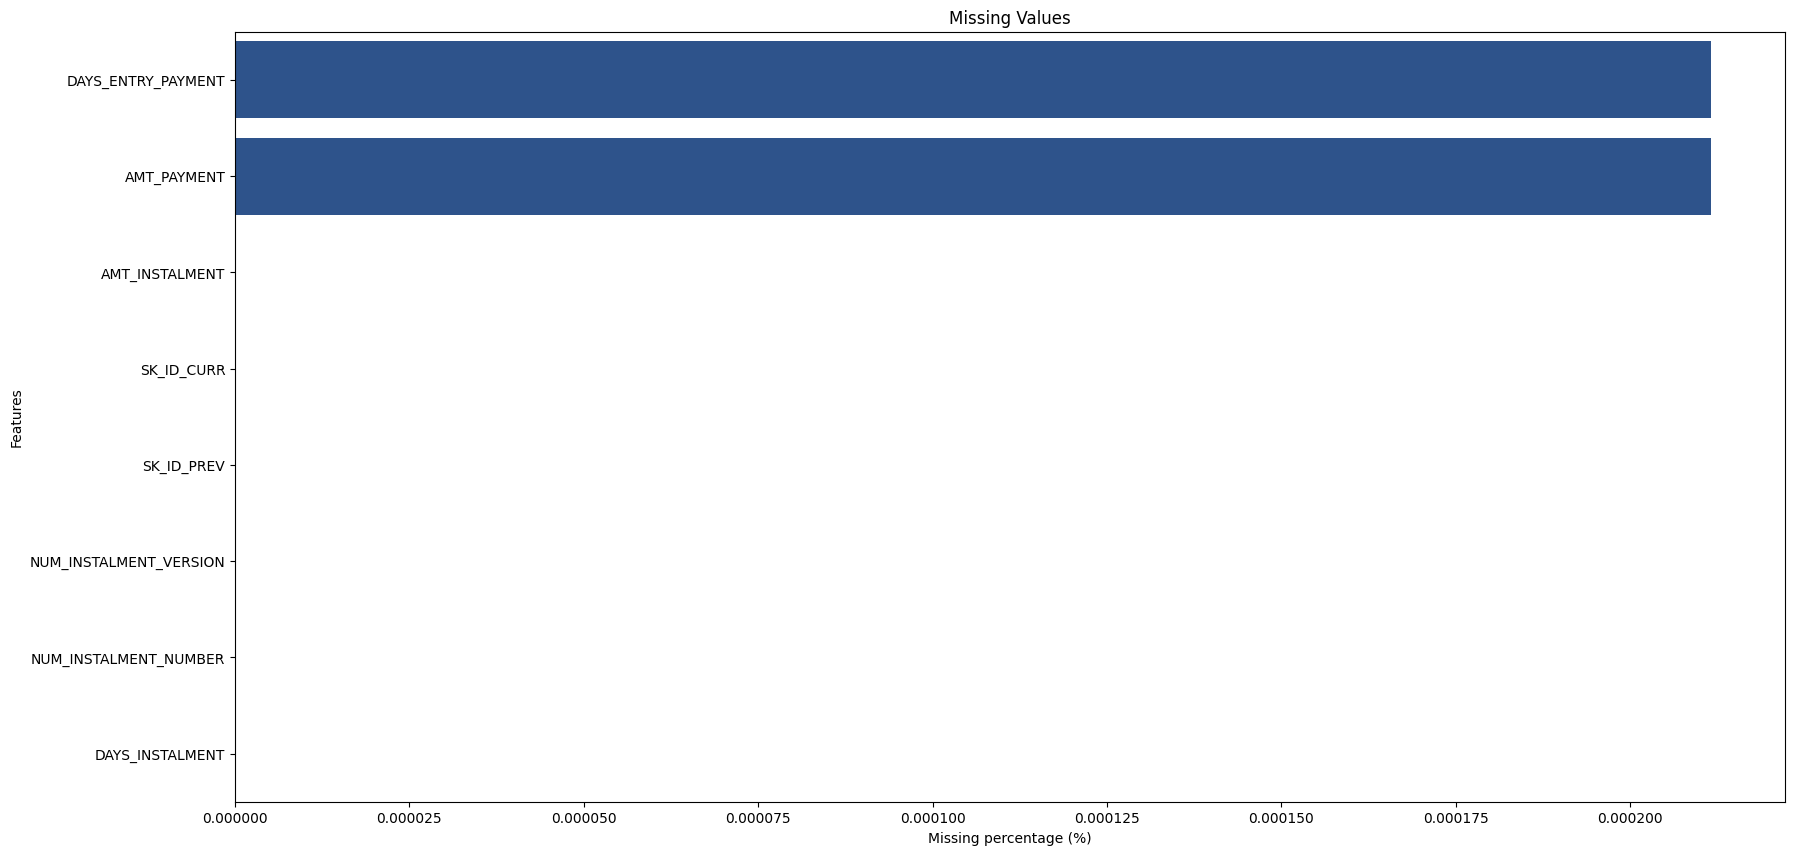

In [29]:
# Barplot of missing values percentage
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.barplot(x=instal.isnull().mean().sort_values(ascending=False), y=instal.isnull().mean().sort_values(ascending=False).index, color='#1f509a',ax=ax)
ax.set_title('Missing Values')

plt.xlabel('Missing percentage (%)')
plt.ylabel('Features')

plt.show()                                    

- Solution:
    - fill a max value in DAY_ENTRY_PAYMENT, indicates the latest payment
    - fill 0 in  AMT_PAYMENT, indicates that the payments have not been made

#### Outliers

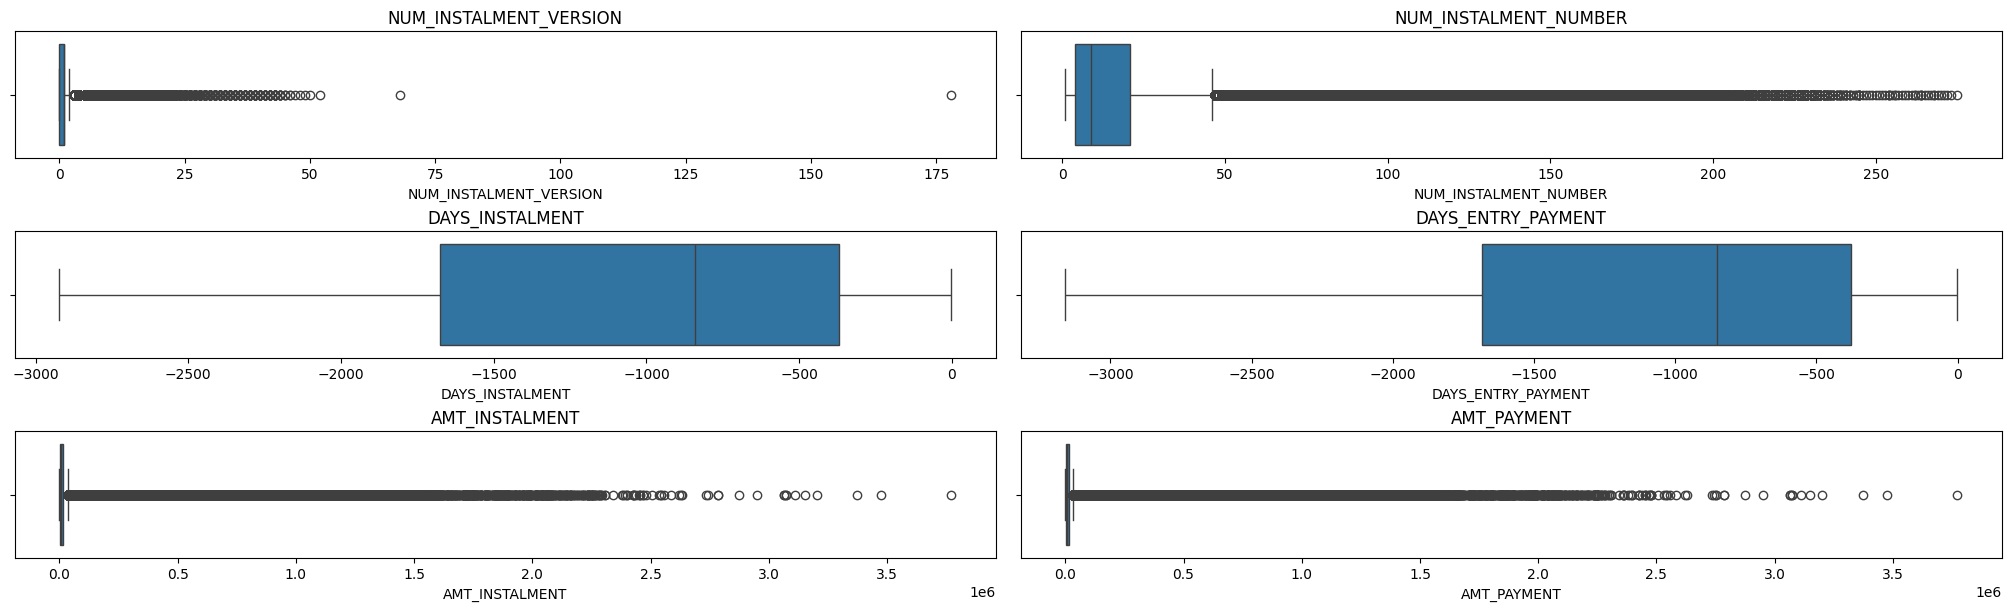

In [ ]:
# Boxplot for outliers
ncol, nrow = 2, len(instal_cols)//2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(instal_cols)), constrained_layout=True)

for ax, column in zip(axes.flatten(), instal_cols):
    sns.boxplot(x=instal[column], color='1f509a', ax=ax)
    ax.set_title(column)

plt.show()

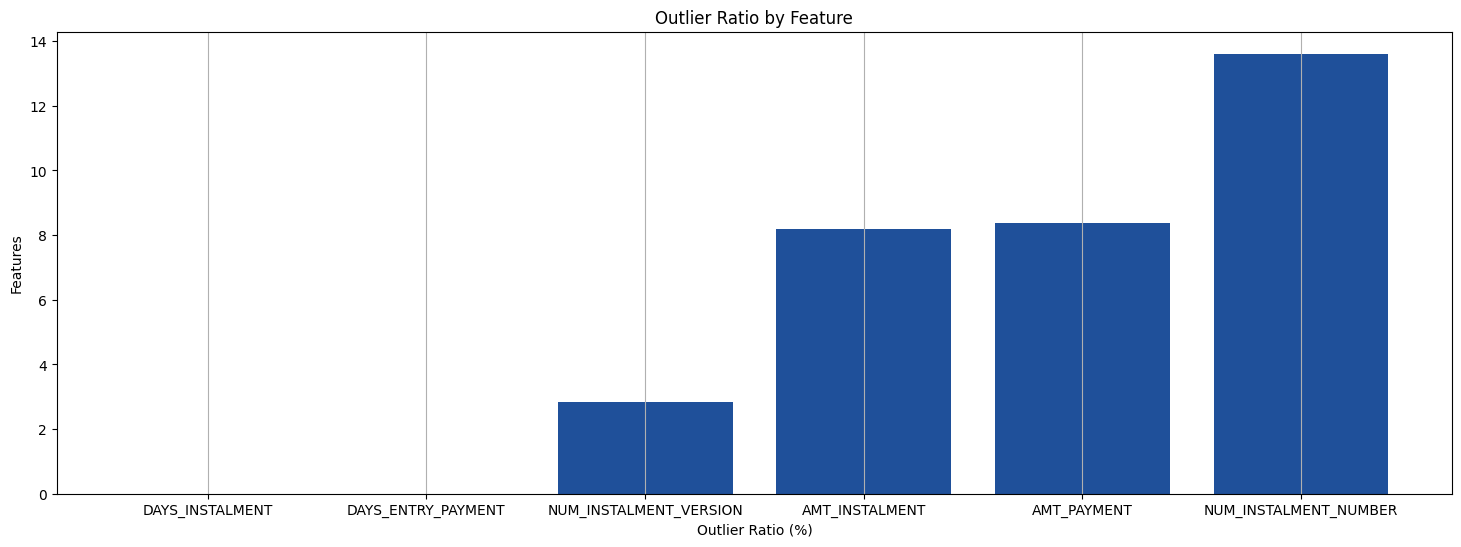

In [87]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


def outlier_ratio(df, column):
        outliers = find_outliers(df, column)
        ratio = len(outliers) / len(df) * 100
        return ratio

# Check outlier ratio for each feature
outlier_ratios = {}
for col in instal_cols:
    outlier_ratios[col] = outlier_ratio(instal, col)

# Convert the outlier ratios to a DataFrame
outlier_ratios_df = pd.DataFrame(outlier_ratios.items(), columns=['Feature', 'Outlier Ratio (%)'])
outlier_ratios_df = outlier_ratios_df.sort_values(by='Outlier Ratio (%)', ascending=True)

# Plotting the outlier ratios
plt.figure(figsize=(18, 6))
plt.bar(outlier_ratios_df['Feature'], outlier_ratios_df['Outlier Ratio (%)'], color='#1f509a')
plt.title('Outlier Ratio by Feature')
plt.xlabel('Outlier Ratio (%)')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

- The outliers will be clip in the modelling stage

#### Descriptive

In [17]:
# Validity check
instal.describe()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
count,7.744758e+06,7.744758e+06,7.744758e+06,7.744758e+06,7.743119e+06,7.744757e+06,7.743119e+06,7.744757e+06
mean,1.902824e+06,8.254635e-01,1.991675e+01,-1.055681e+03,-1.064303e+03,1.672476e+04,1.685389e+04,1.535739e+05
std,5.360570e+05,9.774997e-01,2.763188e+01,8.009713e+02,8.006232e+02,4.997746e+04,5.407602e+04,8.864267e+04
min,1.000001e+06,0.000000e+00,1.000000e+00,-2.922000e+03,-3.160000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.432108e+06,0.000000e+00,4.000000e+00,-1.677000e+03,-1.686000e+03,4.050000e+03,3.375000e+03,7.684800e+04
50%,1.895642e+06,1.000000e+00,9.000000e+00,-8.420000e+02,-8.510000e+02,8.611920e+03,7.906185e+03,1.530760e+05
75%,2.368895e+06,1.000000e+00,2.100000e+01,-3.690000e+02,-3.790000e+02,1.641312e+04,1.575000e+04,2.301440e+05
max,2.843495e+06,1.780000e+02,2.750000e+02,-2.000000e+00,-2.000000e+00,3.771488e+06,3.771488e+06,3.075080e+05


- There is a extreme value in NUM_INSTALMENT_VERSION (178) -> consider drop / replace with NULL

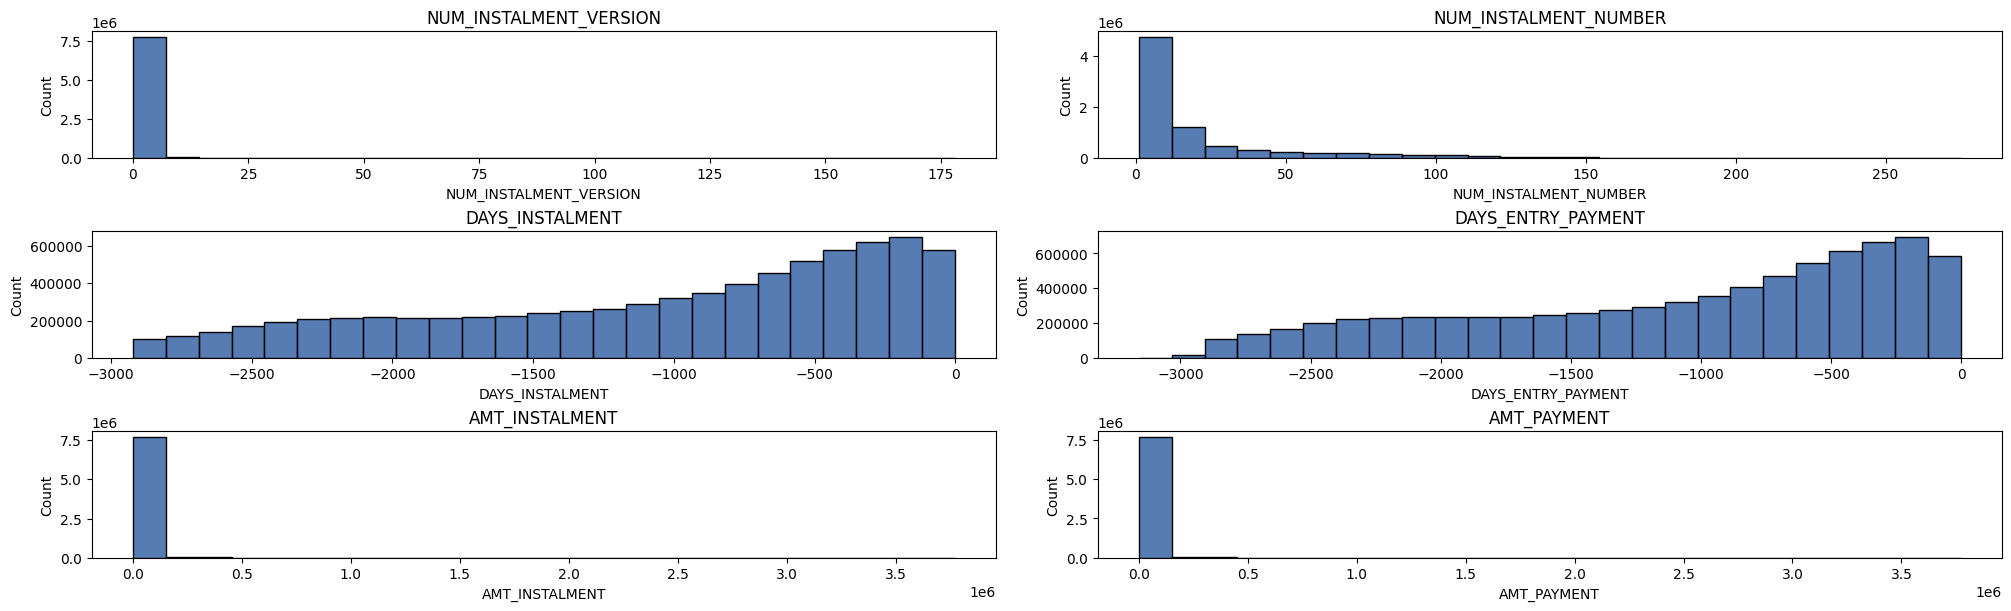

In [66]:
# Historgram of features
ncol, nrow = 2, len(instal_cols)//2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(instal_cols)), constrained_layout=True, )

for ax, column in zip(axes.flatten(), instal_cols):
    sns.histplot(x=instal[column], ax=ax, bins=25, color= '#1f509a')
    ax.set_title(column)

plt.show()

#### Bivariate Analysis

In [77]:
def bivariate_analysis(df):
    plt.figure(figsize=(20, 15))
    df_copy = df.copy()
    
    # Payment Amount Analysis
    plt.subplot(221)
    sns.scatterplot(data=df_copy, x='AMT_INSTALMENT', y='AMT_PAYMENT', alpha=0.5)
    plt.title('Installment Amount vs Payment Amount')
    plt.xlabel('Installment Amount')
    plt.ylabel('Payment Amount')

    # Payment Timing Analysis
    plt.subplot(222)
    sns.scatterplot(data=df_copy, x='DAYS_INSTALMENT', y='DAYS_ENTRY_PAYMENT', alpha=0.5)
    plt.title('Due Date vs Payment Date')

    # Payment Delay Analysis
    df_copy['payment_delay'] = df_copy['DAYS_ENTRY_PAYMENT'] - df_copy['DAYS_INSTALMENT']
    plt.subplot(223)
    sns.histplot(data=df_copy, x='payment_delay', bins=50)
    plt.title('Distribution of Payment Delays')

    # Amount by Installment Number
    plt.subplot(224)
    sns.lineplot(data=df_copy, x='NUM_INSTALMENT_NUMBER', y='AMT_INSTALMENT')
    plt.title('Amount by Installment Number')

    plt.tight_layout()
    plt.show()

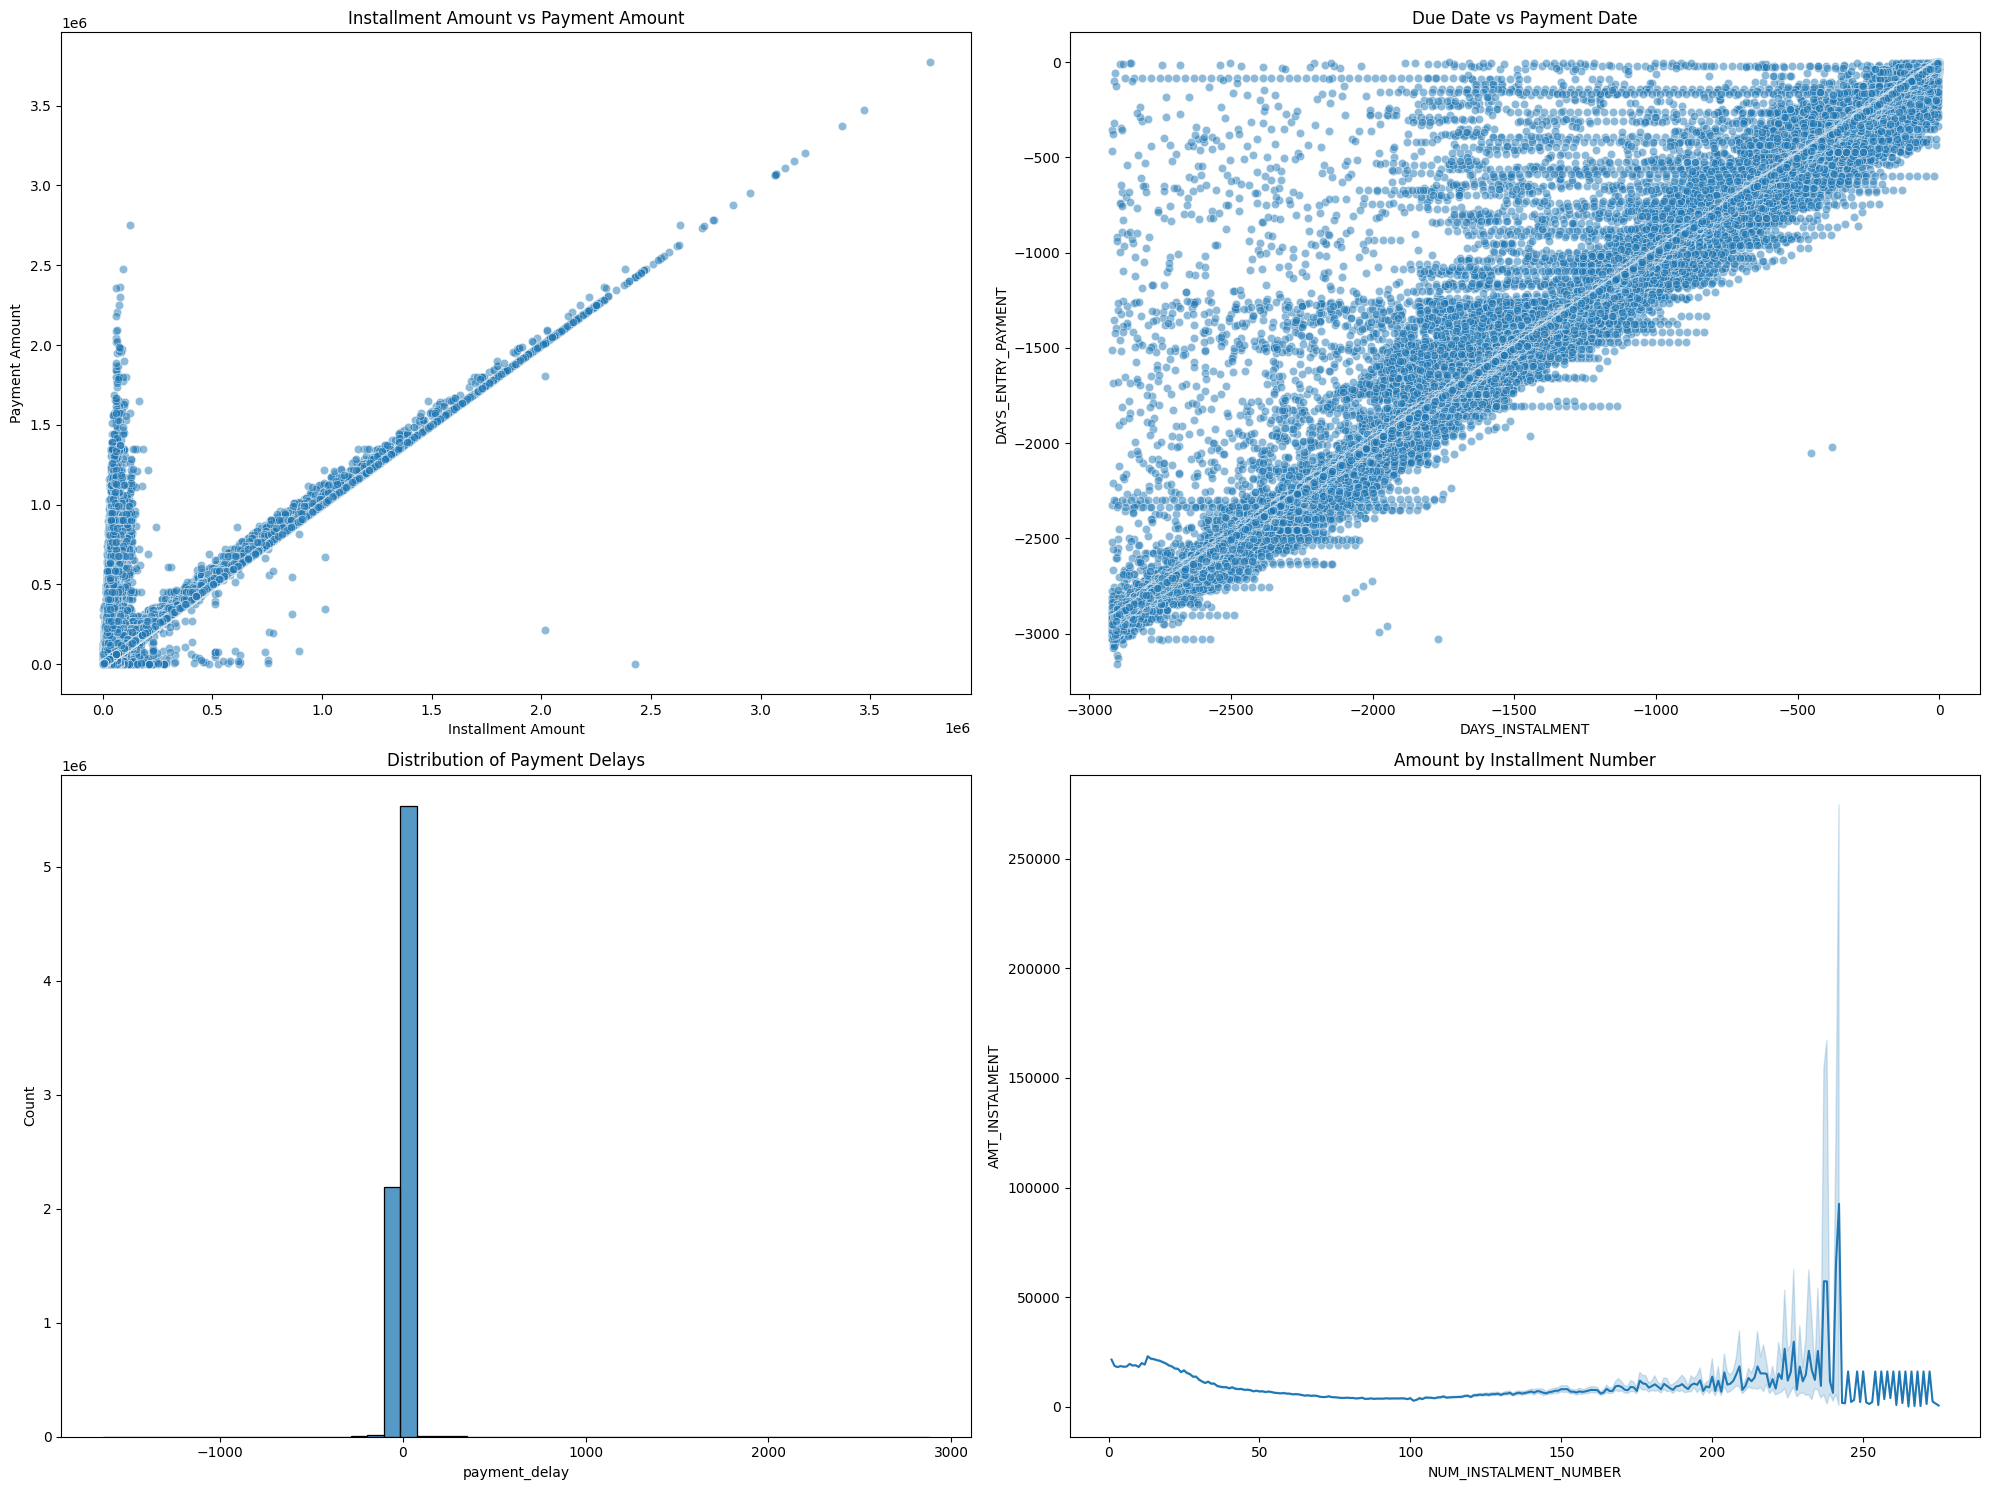

In [78]:
bivariate_analysis(instal)

- Installment Amount vs. Payment Amount    
-> The scatter plot likely shows a strong positive correlation between installment amounts and payment amounts and a near-linear relationship.

- Due Dates vs. Payment Dates  
-> this scatter plot shows points clustered along a diagonal line, it indicates that payment dates are closely aligned with due dates, suggesting timely payments. Any significant clustering of points above the diagonal could indicate common delays in payments

- Distribution of Payment Delays  
-> The distribution likely shows a highly skewed nature, with a large number of payments occurring on or around the due date and fewer payments showing significant delays.

- Amount by Installment Number  
-> The graph may reveal that as the installment number increases, the amount associated with each payment tends to decrease. The sudden increase in payment amounts at this installment number could suggest a specific event or condition that alters the repayment structure.

#### Merge with target

In [75]:
instal_merge = instal.merge(target, on='SK_ID_CURR', how='left')

# drop rows that have null TARGET for easier EDA
instal_merge = instal_merge[~instal_merge['TARGET'].isnull()]

instal_merge

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,TARGET
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0,0.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0,0.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0,0.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0,0.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0,0.0
...,...,...,...,...,...,...,...,...,...
7744752,2657771,0.0,76,-989.0,-989.0,4915.890,4915.890,21216.0,0.0
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0,0.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0,0.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0,0.0


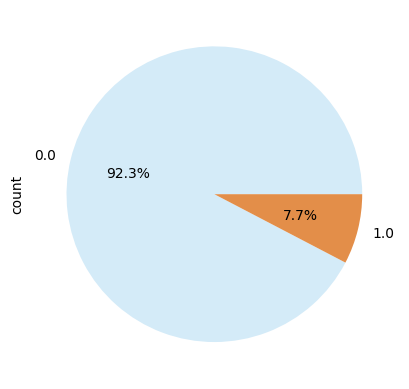

In [76]:
instal_merge['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#d4ebf8', '#e38e49'])
plt.show()

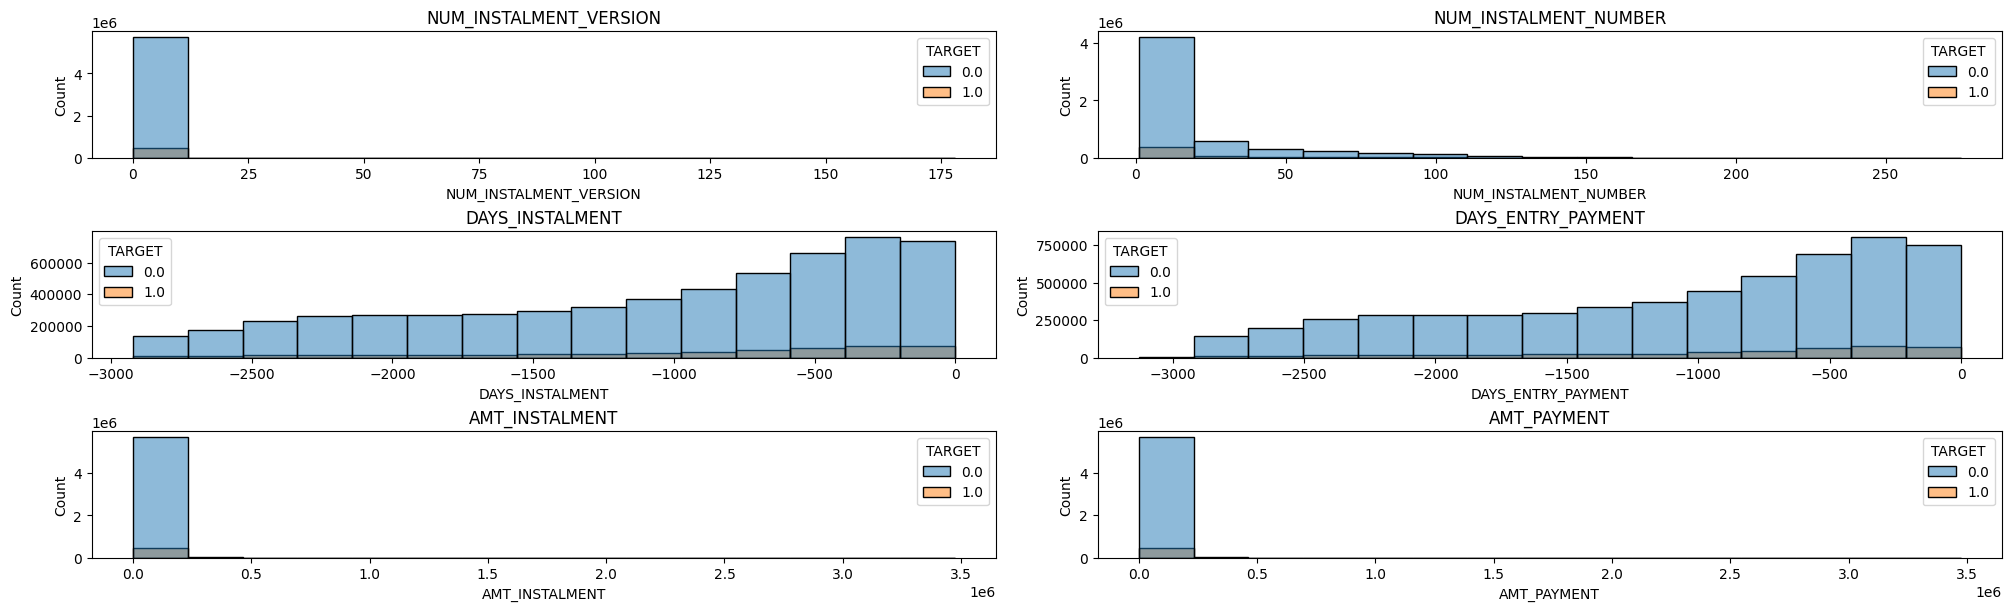

In [71]:
ncol, nrow = 2, len(instal_cols)//2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, len(instal_cols)), constrained_layout=True)

for ax, column in zip(axes.flatten(), instal_cols):
    sns.histplot(x=instal_merge[column], ax=ax, bins=15, hue='TARGET', data=instal_merge, color= '#1f509a')
    ax.set_title(column)

plt.show()

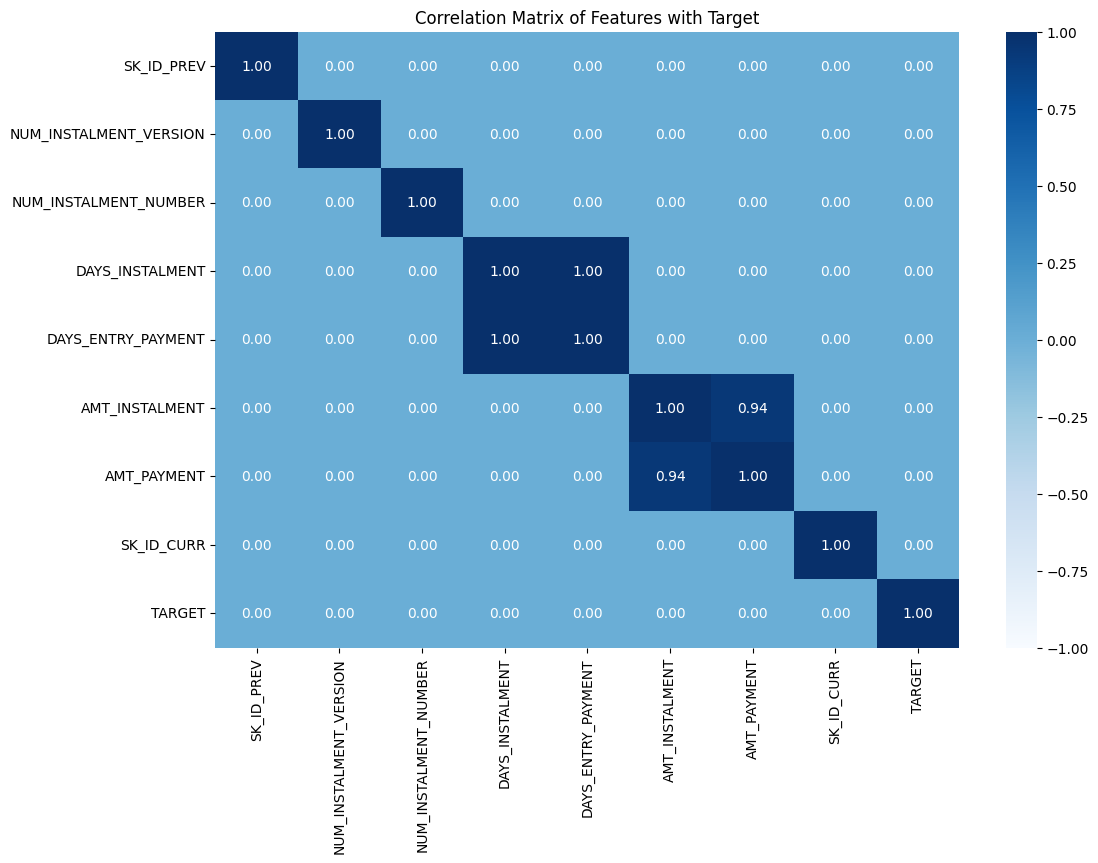

In [85]:
corr_matrix = instal_merge.corr()

# Set corr < 0.8 = 0
corr_matrix[abs(corr_matrix) < 0.8] = 0

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap=sns.color_palette("Blues", as_cmap=True),
            fmt='.2f',
            vmin=-1,  # Set range = [-1, 1]
            vmax=1)   
plt.title('Correlation Matrix of Features with Target')
plt.show()

Từ bản đồ nhiệt của ma trận tương quan, chúng ta thấy một vài biến tương quan cao:
- AMT_INSTALMENT và AMT_PAYMENT
- DAYS_INSTALMENT và DAYS_ENTRY_PAYMENT  
-> Hai bộ tbiến tương quan này là dễ hiểu, vì chúng là các tính năng về thời điểm trả góp đến hạn thanh toán so với thời điểm thanh toán và cả số tiền đến hạn so với số tiền đã trả.  
-> Các biến này sẽ hữu ích cho việc tạo các bộ biến hoàn toàn không tương quan mới.  


chỉ số tương quan của các biến với Target là thâp, điều này cho thấy gần như không có của mối quan hệ tuyến tính giữa biến và Target

In [ ]:
copy = instal_merge.copy()

Nhóm bảng theo trường 'SK_ID_PREV' và tổng hợp với giá trị trung bình -> được một hàng trung bình cho mỗi khoản vay trước đó mà khách hàng đã có

In [ ]:
copy = copy.groupby('SK_ID_PREV').mean()

In [88]:
def plot_continuous_variables(data, column_name,   figsize = (20,8), histogram = True, log_scale = False):
    data_to_plot = data.copy()
    sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
    plt.title("Box-Plot of {}".format(column_name))
    if log_scale:
        plt.yscale('log')
        plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

- 2 biến **DAYS_INSTALMENT** và **DAYS_ENTRY_PAYMENT** có chỉ số tương quan với biến Target cao nhất trong bảng tương quan

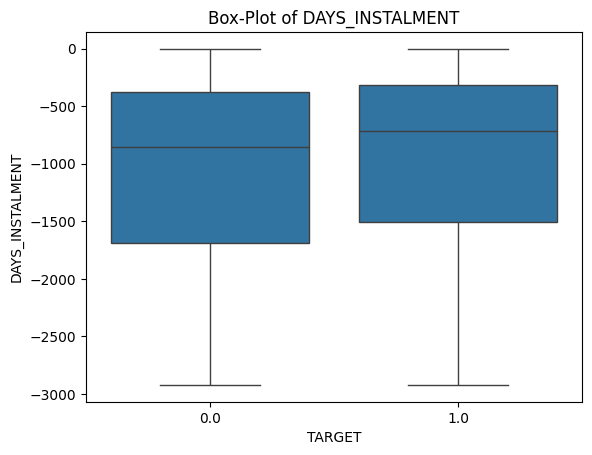

In [89]:
plot_continuous_variables(instal_merge, 'DAYS_INSTALMENT', figsize = (8,8))

- Phân bố của *DAYS_INSTALMENT* ở nhóm **Người không vỡ nợ** rộng hơn -> sự đa dạng lớn hơn về số ngày kể từ khi khoản thanh toán đến hạn.

- Nhóm **Người vỡ nợ** có xu hướng có **DAYS_INSTALMENT** thấp hơn, nghĩa là họ có ít ngày hơn kể từ khi khoản thanh toán đến hạn.

-> Điều này có thể gợi ý rằng những người có nguy cơ vỡ nợ thường có các khoản thanh toán đến hạn gần hơn so với những người không vỡ nợ.

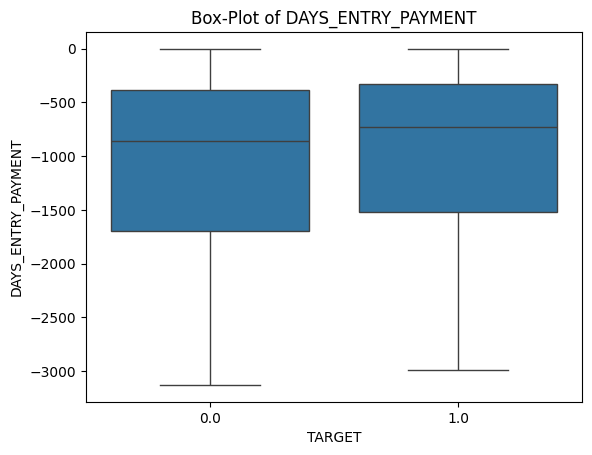

In [92]:
plot_continuous_variables(instal_merge, 'DAYS_ENTRY_PAYMENT', figsize = (8,8))